In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the file

In [90]:
df = pd.read_csv('TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [91]:
print(df.shape)  # rows = 50000, cols = 8

(50000, 8)


#### Data Preporcessing

#### 1) Handle Null

In [92]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

#### 2) Handle Duplicates

In [93]:
df.duplicated().sum()

0

#### 3) Rename all columns

In [94]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [95]:
df.columns =  ['id','amount','datetime','lon_pickup','lat_pickup','lon_drop','lat_drop','cpass']
df.head() # cpass = count of passegers

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


#### 3) Check data types

In [96]:
df.dtypes

id             object
amount        float64
datetime       object
lon_pickup    float64
lat_pickup    float64
lon_drop      float64
lat_drop      float64
cpass           int64
dtype: object

In [97]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

id                         object
amount                    float64
datetime      datetime64[ns, UTC]
lon_pickup                float64
lat_pickup                float64
lon_drop                  float64
lat_drop                  float64
cpass                       int64
dtype: object

In [98]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


### Feature Engineering

In [99]:
df['year'] = df['datetime'].dt.year
df['qtr'] = df['datetime'].dt.quarter
df['month'] = df['datetime'].dt.month
df['month_name'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['day_name'] = df['datetime'].dt.day_name()  # (Mon-0,Sun-6)
df['weekday'] = df['datetime'].dt.weekday
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,month_name,day,day_name,weekday
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,June,15,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,January,5,Tuesday,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,August,18,Thursday,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,April,21,Saturday,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,March,9,Tuesday,1


In [100]:
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,month_name,day,day_name,weekday,hour,minute
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,June,15,Monday,0,17,26
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,January,5,Tuesday,1,16,52
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,August,18,Thursday,3,0,35
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,April,21,Saturday,5,4,30
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,March,9,Tuesday,1,7,51


#### Check data conistency

In [101]:
df.describe()

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,day,weekday,hour,minute
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,2011.739260,2.422800,6.273300,15.672040,3.029980,13.489080,29.665420
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,1.862639,1.121528,3.461157,8.660789,1.956936,6.506935,17.306535
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,2010.000000,1.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,2012.000000,2.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,2013.000000,3.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,6.000000,23.000000,59.000000


#### Inconsistent data

In [102]:
print(df[df['amount']<=0].shape)
print(df[df['cpass']==0].shape)

(9, 17)
(165, 17)


#### Handling inconsistent data

In [103]:
df = df[df['amount']>0]
print(df.shape)

(49991, 17)


In [104]:
df = df[df['cpass']!=0]
print(df.shape)

(49826, 17)


In [105]:
df.describe()

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,day,weekday,hour,minute
count,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000
mean,11.373050,-72.510586,39.934185,-72.506925,39.927466,1.673424,2011.740136,2.423674,6.275960,15.671918,3.029984,13.487757,29.667824
std,9.693572,10.391352,6.225261,10.400046,6.011749,1.287790,1.865187,1.121359,3.460611,8.660948,1.957200,6.508542,17.308757
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000,2010.000000,1.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000,2012.000000,2.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.967145,40.767364,-73.963619,40.768163,2.000000,2013.000000,3.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [106]:
# [0 - 6, 6-12, 12-18, 18-24]
# Early Morning/late night(0) - 0-6
# Morning(1) - 6-12
# Afternoon(2) - 12-18
# Night(3)  - 18-24

# (0-4) - Late Night(0)
# (4-8) - Early morning(1)
# (8-12) - Monring(2)
# (12-16) - Afternoon(3)
# (16-20) - Evening(4)
# (20-24) - Night(5)

In [107]:
def compute_hour_qtr(x):
    if x>=0 and x<=4:     # Late Night
        return 0
    elif x>4 and x<=8 :   # Early morning
        return 1
    elif x>8 and x<=12 :  # Morning
        return 2
    elif x>12 and x<=16 : # Afternoon
        return 3
    elif x>16 and x<=20 : # evening
        return 4
    else:                 # night
        return 5        
    

In [108]:
df['hour_qtr'] = df['hour'].apply(compute_hour_qtr)
df['hour_qtr'].value_counts()

hour_qtr
4    11512
2     9426
3     9308
5     8060
0     5904
1     5616
Name: count, dtype: int64

In [109]:
df.describe()

,amount,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,day,weekday,hour,minute,hour_qtr
count,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000
mean,11.373050,-72.510586,39.934185,-72.506925,39.927466,1.673424,2011.740136,2.423674,6.275960,15.671918,3.029984,13.487757,29.667824,2.784490
std,9.693572,10.391352,6.225261,10.400046,6.011749,1.287790,1.865187,1.121359,3.460611,8.660948,1.957200,6.508542,17.308757,1.593161
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000,2010.000000,1.000000,3.000000,8.000000,1.000000,9.000000,15.000000,2.000000
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000,2012.000000,2.000000,6.000000,16.000000,3.000000,14.000000,30.000000,3.000000
75%,12.500000,-73.967145,40.767364,-73.963619,40.768163,2.000000,2013.000000,3.000000,9.000000,23.000000,5.000000,19.000000,45.000000,4.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,6.000000,23.000000,59.000000,5.000000


#### Note
1) Latitude ranges from  : -90 to 90<br>
2) Longitude ranges from :  -180 to 180<br>

In [110]:
print(df[(df['lon_pickup']<-180) |  (df['lon_pickup']>180)].shape)
print(df[(df['lon_drop']<-180) |  (df['lon_drop']>180)].shape)

(0, 18)
(0, 18)


In [111]:
print(df[(df['lat_pickup']<-90) | (df['lat_pickup']>90)].shape)
print(df[(df['lat_drop']<-90) | (df['lat_drop']>90)].shape)

(1, 18)
(0, 18)


In [112]:
df[(df['lat_pickup']<-90) | (df['lat_pickup']>90)]

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,month_name,day,day_name,weekday,hour,minute,hour_qtr
5686,15:00.0,3.3,2011-07-30 11:15:00+00:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,3,7,July,30,Saturday,5,11,15,2


In [113]:
print(df.shape)

(49826, 18)


In [114]:
df = df[(df['lat_pickup']>=-90) & (df['lat_pickup']<=90)]
df.shape

(49825, 18)

In [115]:
df.index = list(range(len(df)))

In [116]:
df.tail()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,month_name,day,day_name,weekday,hour,minute,hour_qtr
49820,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,2,6,June,12,Wednesday,2,23,25,5
49821,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,2,6,June,22,Monday,0,17,19,4
49822,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,1,January,30,Sunday,6,4,53,0
49823,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,4,11,November,6,Tuesday,1,7,9,1
49824,13:14.0,10.9,2010-01-13 08:13:14+00:00,-73.932603,40.763805,-73.932603,40.763805,1,2010,1,1,January,13,Wednesday,2,8,13,1


#### Outlier Treatment  - Latitude, Longitude

In [117]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'cpass', 'year', 'qtr', 'month', 'month_name', 'day',
       'day_name', 'weekday', 'hour', 'minute', 'hour_qtr'],
      dtype='object')

In [118]:
a1 = df.iloc[:,3:7].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,4%,5%,50%,95%,97%,98%,99%,max
lon_pickup,-75.423848,-74.014445,-74.010464,-74.008736,-74.007743,-74.006819,-73.981838,-73.871363,-73.786896,-73.239712,0.000000,40.783472
lat_pickup,-74.006893,0.000000,40.583785,40.645444,40.681172,40.702190,40.752685,40.787791,40.794314,40.799559,40.807074,43.098708
lon_drop,-84.654241,-74.015120,-74.011760,-74.009839,-74.008280,-74.007273,-73.980087,-73.873373,-73.802166,-73.474126,0.000000,40.851027
lat_drop,-74.006377,0.000000,40.572868,40.646899,40.672870,40.686191,40.753375,40.794042,40.804067,40.810229,40.832378,43.415190


In [119]:
df1 = df.copy()

In [120]:
print(df[df['lon_pickup']>-73.239712].shape)
print(df[df['lon_drop']>-73.474126].shape)
print(df[df['lat_pickup']<40.583785].shape)
print(df[df['lat_drop']<40.572868].shape)

(997, 18)
(997, 18)
(997, 18)
(997, 18)


In [121]:
df_outliers = df[(df['lon_pickup']>-73.239712) | (df['lon_drop']>-73.474126) | 
                 (df['lat_pickup']<40.583785) | (df['lat_drop']<40.572868)]
df_outliers.shape

(1082, 18)

In [122]:
# !pip install folium

In [123]:
import folium
from folium import Marker, PolyLine

In [124]:
df.head(2)

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,month_name,day,day_name,weekday,hour,minute,hour_qtr
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,June,15,Monday,0,17,26,4
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,January,5,Tuesday,1,16,52,3


In [125]:
#                    lat,      long
map1 = folium.Map([40.721319,-73.844311],style='openstreetmap')
map1

In [126]:
df_outliers[df['lon_pickup']!=0].shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_15496\4134231052.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers[df['lon_pickup']!=0].shape


(131, 18)

In [127]:
w1 = df_outliers[df['lon_pickup']!=0]
# w1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15496\1973550505.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  w1 = df_outliers[df['lon_pickup']!=0]


In [128]:
lt1 = w1['lon_pickup']
ln1 = w1['lat_pickup']

In [129]:
for i,j in zip(lt1,ln1):
    Marker(location=(i,j), tooltip=f'{str(i)}{str(j)}',
          icon=folium.Icon(color='red')).add_to(map1)

map1

#### Outlier Treatment - Lat, Long

In [130]:
print(df[df['lon_pickup']>-73.239712].shape)
print(df[df['lon_drop']>-73.474126].shape)
print(df[df['lat_pickup']<40.583785].shape)
print(df[df['lat_drop']<40.572868].shape)

(997, 18)
(997, 18)
(997, 18)
(997, 18)


In [131]:
a1 = df.iloc[:,3:7].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,4%,5%,50%,95%,97%,98%,99%,max
lon_pickup,-75.423848,-74.014445,-74.010464,-74.008736,-74.007743,-74.006819,-73.981838,-73.871363,-73.786896,-73.239712,0.000000,40.783472
lat_pickup,-74.006893,0.000000,40.583785,40.645444,40.681172,40.702190,40.752685,40.787791,40.794314,40.799559,40.807074,43.098708
lon_drop,-84.654241,-74.015120,-74.011760,-74.009839,-74.008280,-74.007273,-73.980087,-73.873373,-73.802166,-73.474126,0.000000,40.851027
lat_drop,-74.006377,0.000000,40.572868,40.646899,40.672870,40.686191,40.753375,40.794042,40.804067,40.810229,40.832378,43.415190


In [132]:
df['lon_pickup'] =  np.where(df['lon_pickup']> -73.239712, -73.239712, df['lon_pickup'])
df['lon_drop'] =  np.where(df['lon_drop'] > -73.474126,  -73.474126, df['lon_drop'])

df['lat_pickup'] =  np.where(df['lat_pickup']< 40.583785, 40.583785, df['lat_pickup'])
df['lat_drop'] =  np.where(df['lat_drop']< 40.572868, 40.572868, df['lat_drop'])

In [133]:
a1 = df.iloc[:,3:7].describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,4%,5%,50%,95%,97%,98%,99%,max
lon_pickup,-75.423848,-74.014445,-74.010464,-74.008736,-74.007743,-74.006819,-73.981838,-73.871363,-73.786896,-73.292918,-73.239712,-73.239712
lat_pickup,40.583785,40.583785,40.585624,40.645444,40.681172,40.702190,40.752685,40.787791,40.794314,40.799559,40.807074,43.098708
lon_drop,-84.654241,-74.015120,-74.011760,-74.009839,-74.008280,-74.007273,-73.980087,-73.873373,-73.802166,-73.493118,-73.474126,-73.474126
lat_drop,40.572868,40.572868,40.573724,40.646899,40.672870,40.686191,40.753375,40.794042,40.804067,40.810229,40.832378,43.415190


In [135]:
df.head(2)

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,month_name,day,day_name,weekday,hour,minute,hour_qtr
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,June,15,Monday,0,17,26,4
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,January,5,Tuesday,1,16,52,3


#### Plotting Map

In [136]:
map2 = folium.Map([40.721319,-73.844311],style='openstreetmap')
map2

In [137]:
samp = df.sample(30)

In [138]:
# Pickup coordinates
lt2p = samp['lat_pickup']
ln2p = samp['lon_pickup']
# Drop coordinates
lt2d = samp['lat_drop']
ln2d = samp['lon_drop']
indx = samp.index

#### Plotting Pickup Locations

In [139]:
for i,j,k in zip(lt2p,ln2p,indx):
    Marker([i,j],tooltip=f'{str(i)},{str(j)},{k}',
          icon= folium.Icon(color='green')).add_to(map2)
map2           

#### Plotting Drop Locations

In [140]:
for i,j,k in zip(lt2d,ln2d,indx):
    Marker([i,j],tooltip=f'{str(i)},{str(j)},{k}',
          icon= folium.Icon(color='orange')).add_to(map2)
map2           

In [141]:
data = []
for lt1,ln1,lt2,ln2 in zip(lt2p,ln2p,lt2d,ln2d):
    data.append([[lt1,ln1],[lt2,ln2]])
data[:5]

[[[40.69298935, -73.93738556], [40.69466782, -73.97216034]],
 [[40.750061, -73.995003], [40.69369, -73.966918]],
 [[40.761947, -73.965352], [40.75755, -73.976584]],
 [[40.73643, -73.982147], [40.744092, -73.999082]],
 [[40.738123, -74.00817], [40.746697, -73.98062]]]

In [142]:
for i,j in data:
    line = folium.PolyLine(locations=[i,j], color='blue', weight=3, opacity=0.8)
    line.add_to(map2)

map2

### Compute Distance
<pre>
Distance Formula
A(x1,y1), B(x2,y2)
1) Minkowski Distance = ((|x2-x1|)^p + (|y2-y1|)^p)^(1/p), p = int
2) Euclidean Distance = sqrt((x2-x1)^2 + (y2-y1)^2)), p = 2
3) Manhattan Distance = (|x2-x|) + (|y2-y1|), p = 1


In [143]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,month_name,day,day_name,weekday,hour,minute,hour_qtr
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,June,15,Monday,0,17,26,4
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,January,5,Tuesday,1,16,52,3
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,August,18,Thursday,3,0,35,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,April,21,Saturday,5,4,30,0
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,March,9,Tuesday,1,7,51,1


In [146]:
def compute_distance(lat1,lat2,lon1,lon2,p):
    dist = ((abs(lat2 - lat1))**p + (abs(lon2 - lon1))**p)**(1/p) 
    return dist

In [147]:
# lon_pickup 	lat_pickup 	lon_drop 	lat_drop
df['Euclidean_Dist'] = compute_distance(df['lat_pickup'],df['lat_drop'],
                                        df['lon_pickup'],df['lon_drop'],p=2)

df['Manhattan_Dist'] = compute_distance(df['lat_pickup'],df['lat_drop'],
                                        df['lon_pickup'],df['lon_drop'],p=1)

In [148]:
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,month,month_name,day,day_name,weekday,hour,minute,hour_qtr,Euclidean_Dist,Manhattan_Dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,June,15,Monday,0,17,26,4,0.009436,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,January,5,Tuesday,1,16,52,3,0.079696,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,August,18,Thursday,3,0,35,0,0.013674,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,April,21,Saturday,5,4,30,0,0.025340,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,March,9,Tuesday,1,7,51,1,0.019470,0.027194


### Harvsine Distanace 
Given pair of lat and lon between 2 points, it computes distance between them in arc.

In [149]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [150]:
def generate_haversine():
    hav_dis = []
    for i in range(len(df)):
        lat_pair_r = [radians(df['lat_pickup'].iloc[i]),
                    radians(df['lon_pickup'].iloc[i])]
        lon_pair_r = [radians(df['lat_drop'].iloc[i]),
                    radians(df['lon_drop'].iloc[i])]
        res = (haversine_distances([lat_pair_r, lon_pair_r])*6371)[0][1]
        # radius of earth = 6371 kms
        hav_dis.append(res)
    return hav_dis

In [151]:
df['Haversine_Dist'] = generate_haversine()
df.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,...,month_name,day,day_name,weekday,hour,minute,hour_qtr,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,...,June,15,Monday,0,17,26,4,0.009436,0.011742,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,...,January,5,Tuesday,1,16,52,3,0.079696,0.107481,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,...,August,18,Thursday,3,0,35,0,0.013674,0.019212,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,...,April,21,Saturday,5,4,30,0,0.025340,0.029386,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,...,March,9,Tuesday,1,7,51,1,0.019470,0.027194,1.999157


In [152]:
df.iloc[[41315]]

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,...,month_name,day,day_name,weekday,hour,minute,hour_qtr,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
41315,44:13.0,5.3,2012-08-27 14:44:13+00:00,-73.965352,40.761947,-73.976584,40.75755,3,2012,3,...,August,27,Monday,0,14,44,3,0.012062,0.015629,1.064891


In [153]:
np.sqrt((40.75755 -  40.761947)**2 + (-73.976584 - (-73.965352))**2)

0.01206198296301769

In [154]:
df.iloc[[3690]]

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,...,month_name,day,day_name,weekday,hour,minute,hour_qtr,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
3690,51:00.0,15.5,2014-06-22 18:51:00+00:00,-73.953905,40.778627,-73.9383,40.827847,2,2014,2,...,June,22,Sunday,6,18,51,4,0.051635,0.064825,5.628418


In [155]:
np.sqrt((40.827847 -  40.778627)**2 + (-73.9383 - (-73.953905))**2)

0.05163452745014788

### EDA

In [157]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'cpass', 'year', 'qtr', 'month', 'month_name', 'day',
       'day_name', 'weekday', 'hour', 'minute', 'hour_qtr', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist'],
      dtype='object')

In [161]:
df['hour_qtr1'] = pd.cut(df['hour'],bins=[0,4,8,12,16,20,24],
                        labels =[0,1,2,3,4,5])
df['hour_qtr1'].value_counts()

hour_qtr1
4    11512
2     9425
3     9308
5     8060
1     5616
0     4016
Name: count, dtype: int64

In [162]:
df['hour_qtr'].value_counts()

hour_qtr
4    11512
2     9425
3     9308
5     8060
0     5904
1     5616
Name: count, dtype: int64

In [169]:
cat_cols = ['cpass', 'year', 'qtr', 'month_name', 'day',
            'day_name',  'hour', 'hour_qtr']
num_cols = ['amount', 'Euclidean_Dist','Manhattan_Dist', 'Haversine_Dist']

#### Univaraite - Cat Cols

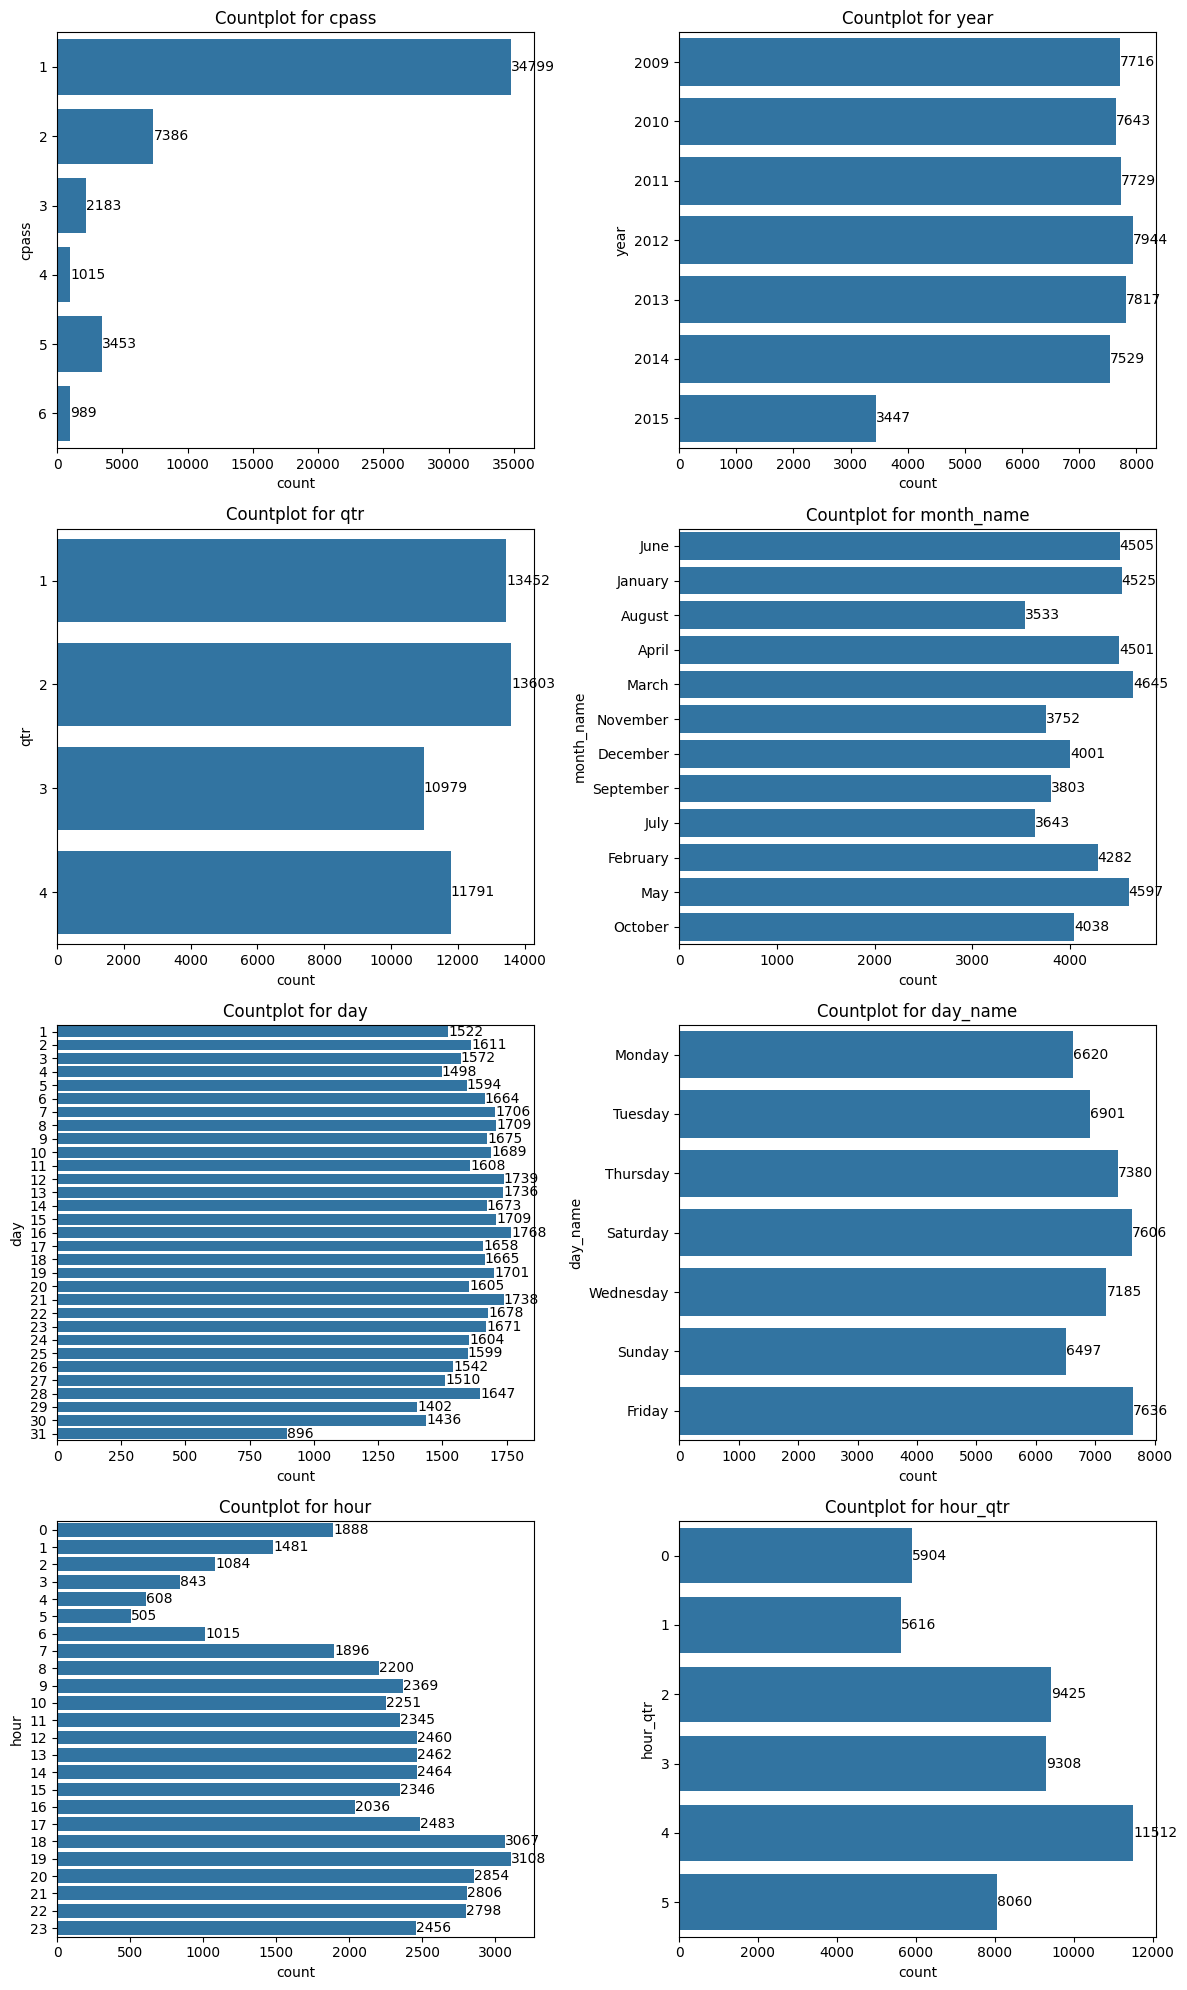

In [170]:
cols = cat_cols

plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(y=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Bi-varaite Analysis

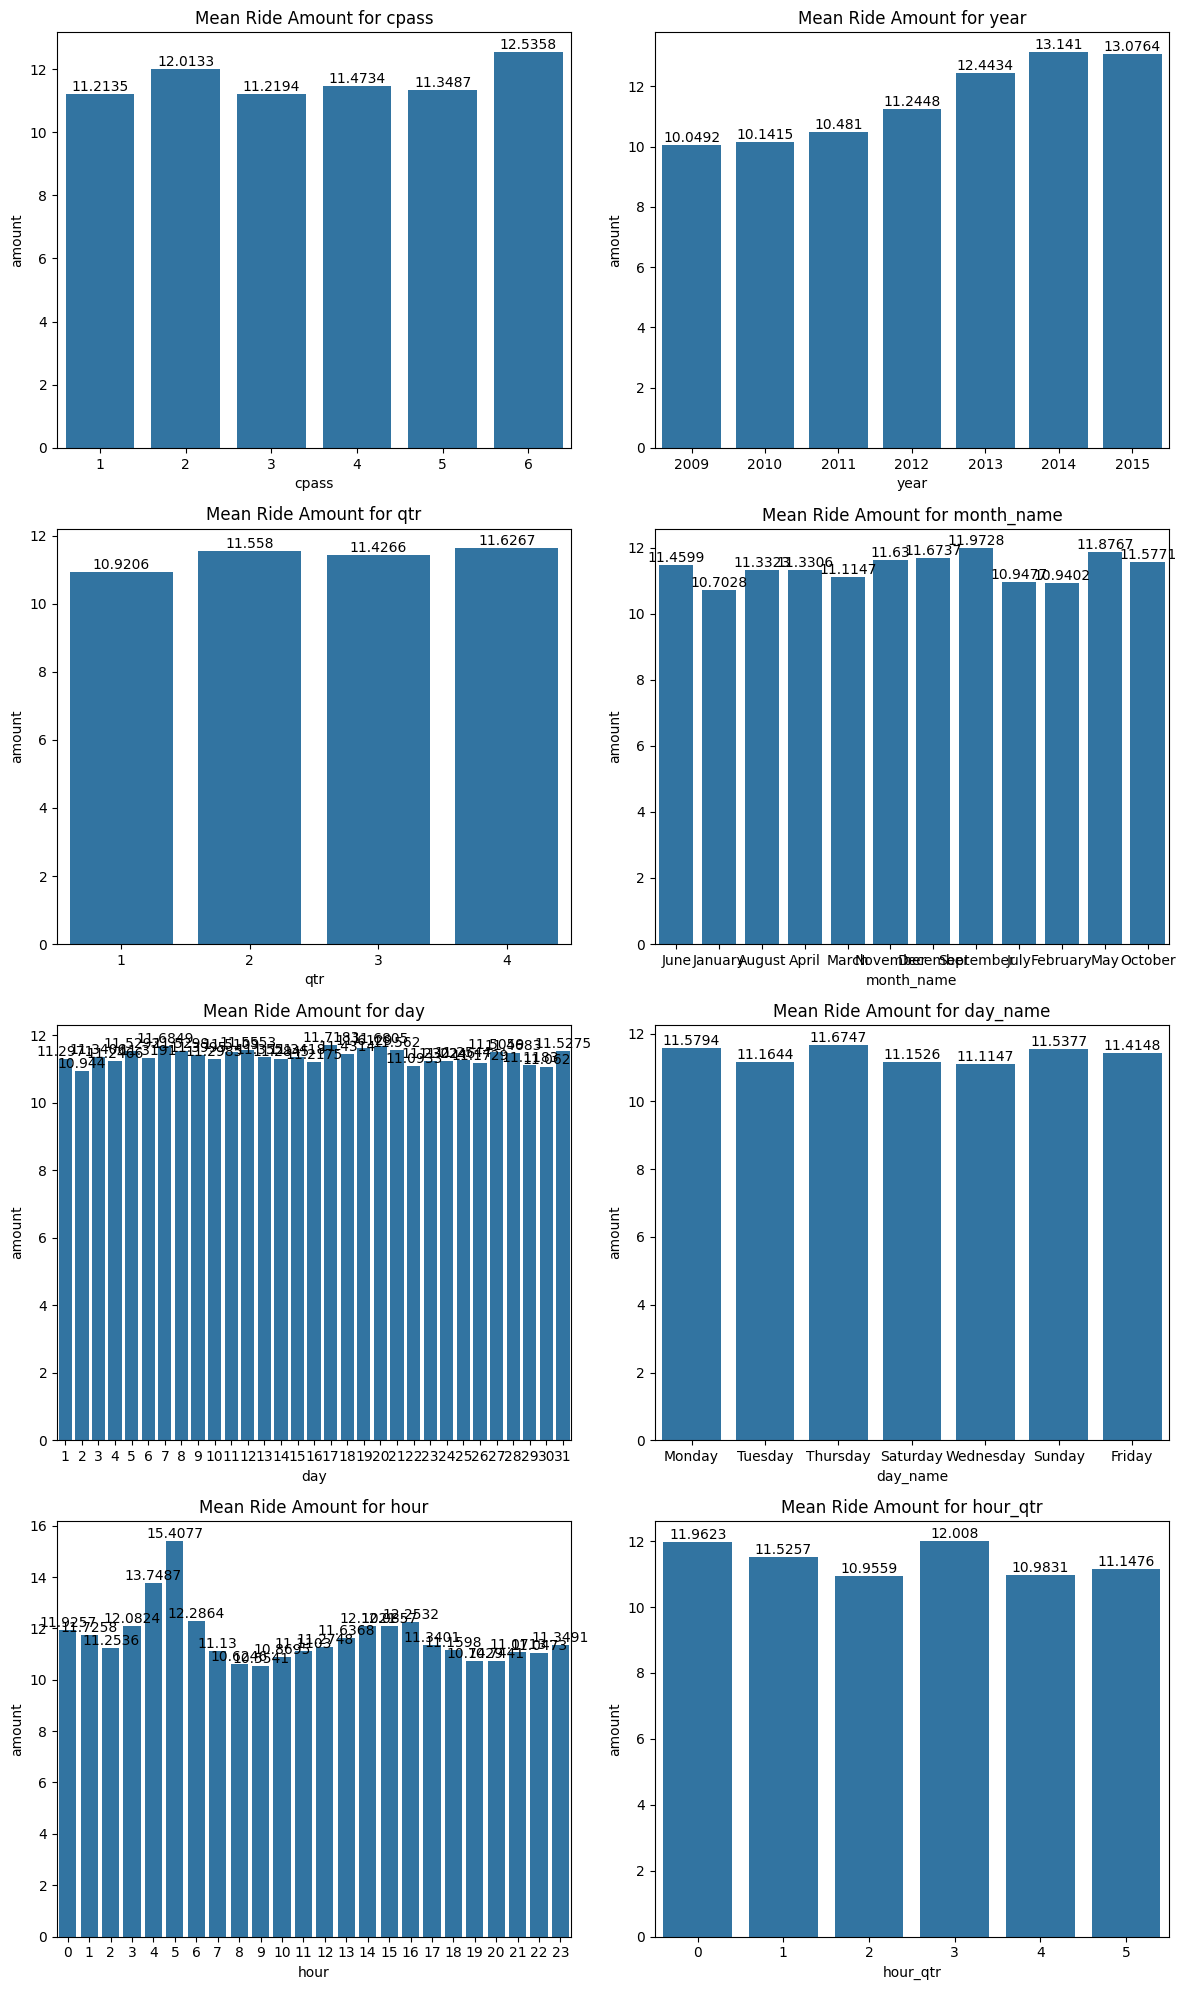

In [174]:
cols = cat_cols

plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    ax = sns.barplot(x=df[cols[i]],y=df['amount'],errorbar=('ci', 0))
    ax.bar_label(ax.containers[0])
    plt.title(f'Mean Ride Amount for {cols[i]}')

plt.tight_layout()
plt.show()

#### Univariate - KDEplot

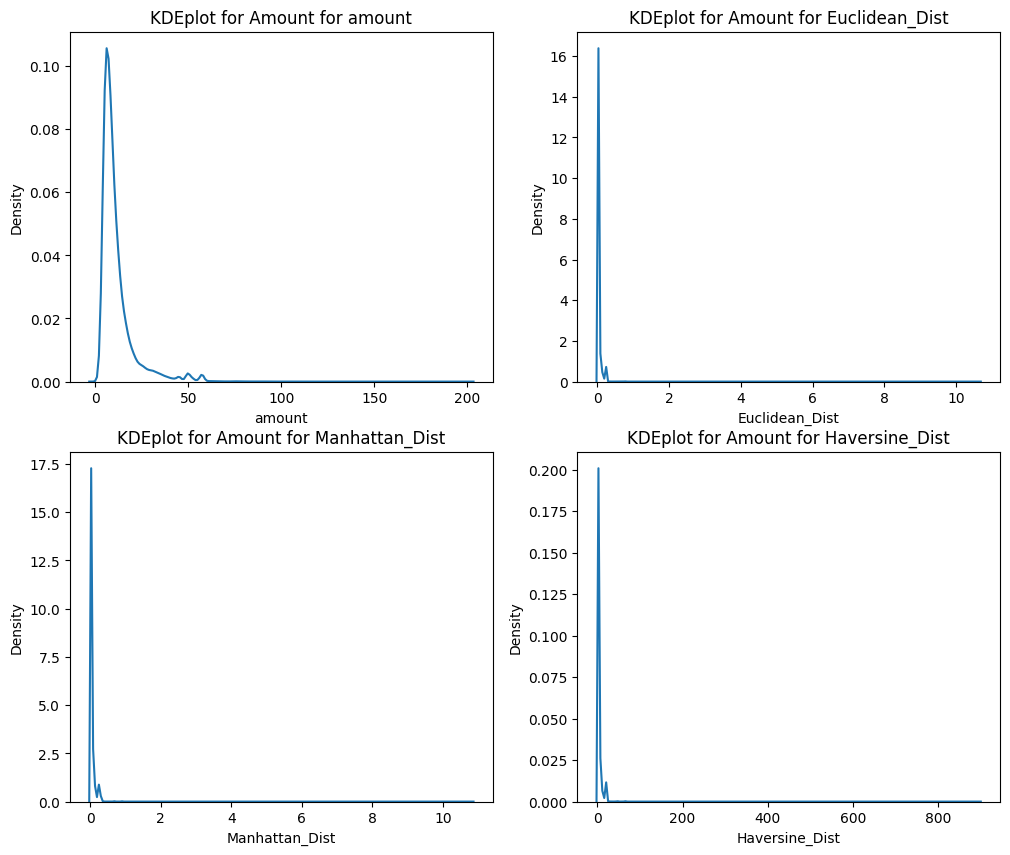

In [176]:
cols = num_cols

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[cols[i]])
    plt.title(f'KDEplot for Amount for {cols[i]}')

plt.show()

#### Analyzing the distances

In [177]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'cpass', 'year', 'qtr', 'month', 'month_name', 'day',
       'day_name', 'weekday', 'hour', 'minute', 'hour_qtr', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist', 'hour_qtr1'],
      dtype='object')

In [178]:
df.iloc[:,[-4,-3,-2]].describe()

,Euclidean_Dist,Manhattan_Dist,Haversine_Dist
count,49825.000000,49825.000000,49825.000000
mean,0.039518,0.049843,3.782257
std,0.073428,0.083408,6.406780
min,0.000000,0.000000,0.000000
25%,0.013051,0.016690,1.280583
50%,0.022344,0.028739,2.211265
75%,0.041002,0.053869,4.144702
max,10.661284,10.837566,898.809128


#### Extract Records with Round Trip

In [190]:
df.shape

(49825, 22)

In [188]:
round_trip = df[(df['Euclidean_Dist']==0) | (df['Manhattan_Dist']==0) | 
                (df['Haversine_Dist']==0)]
round_trip.shape

(520, 22)

In [181]:
round_trip.head()

,id,amount,datetime,lon_pickup,lat_pickup,lon_drop,lat_drop,cpass,year,qtr,...,day,day_name,weekday,hour,minute,hour_qtr,Euclidean_Dist,Manhattan_Dist,Haversine_Dist,hour_qtr1
105,08:52.0,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,2009,1,...,25,Wednesday,2,0,8,0,0.0,0.0,0.0,NaN
191,55:58.0,6.5,2014-01-08 21:55:58+00:00,-73.998488,40.726303,-73.998488,40.726303,1,2014,1,...,8,Wednesday,2,21,55,5,0.0,0.0,0.0,5
270,53:42.0,7.5,2012-08-25 01:53:42+00:00,-73.995892,40.746454,-73.995892,40.746454,1,2012,3,...,25,Saturday,5,1,53,0,0.0,0.0,0.0,0
290,33:00.0,6.9,2009-12-14 12:33:00+00:00,-73.982432,40.745747,-73.982432,40.745747,1,2009,4,...,14,Monday,0,12,33,2,0.0,0.0,0.0,2
395,12:44.0,12.0,2014-03-12 18:12:44+00:00,-73.844904,40.736318,-73.844904,40.736318,1,2014,1,...,12,Wednesday,2,18,12,4,0.0,0.0,0.0,4


In [184]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'cpass', 'year', 'qtr', 'month', 'month_name', 'day',
       'day_name', 'weekday', 'hour', 'minute', 'hour_qtr', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist', 'hour_qtr1'],
      dtype='object')

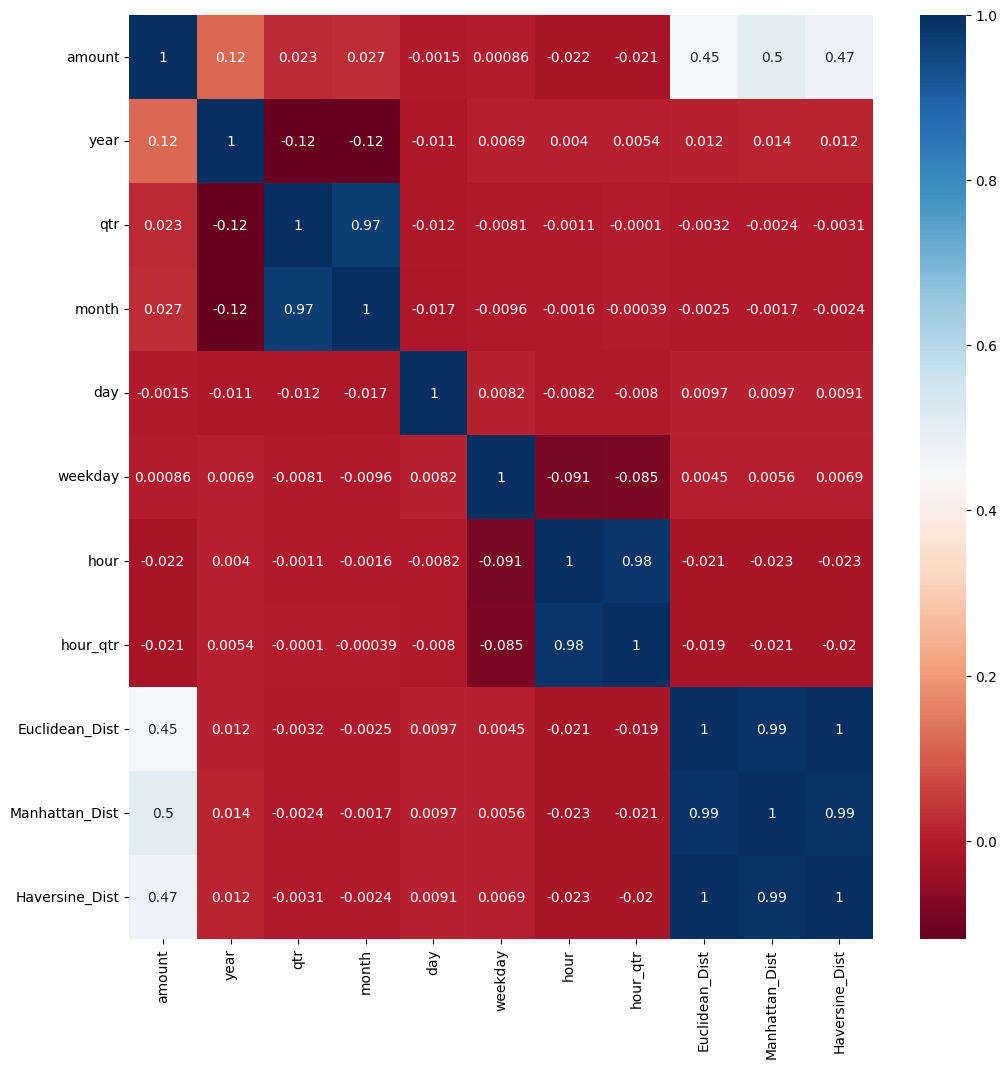

In [186]:
corr = df.iloc[:,[1,8,9,10,12,14,15,17,18,19,20]].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

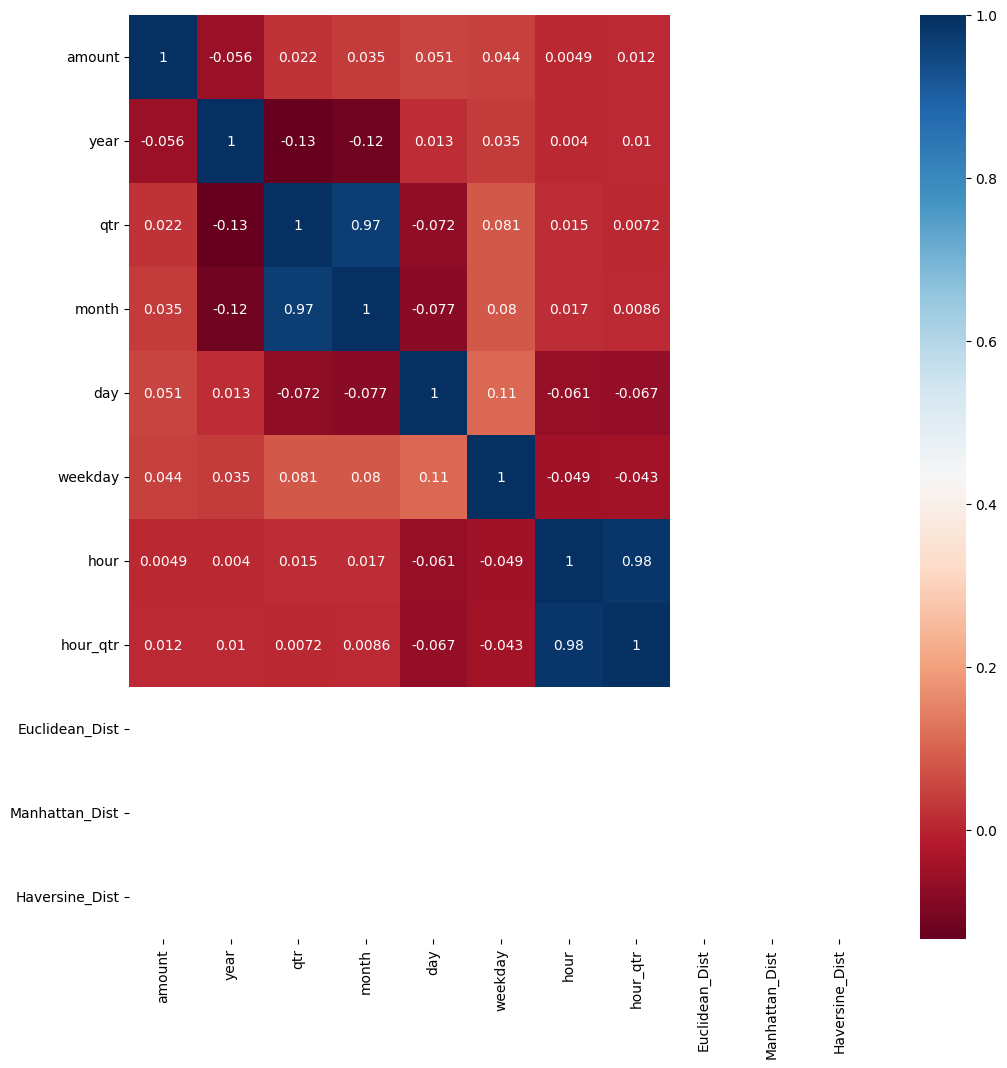

In [189]:
rt_corr = round_trip.iloc[:,[1,8,9,10,12,14,15,17,18,19,20]].corr()

plt.figure(figsize=(12,12))
sns.heatmap(rt_corr,annot=True,cmap='RdBu')
plt.show()

### Removing Round Trip records

In [196]:
df3 = df2.copy()

In [192]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'cpass', 'year', 'qtr', 'month', 'month_name', 'day',
       'day_name', 'weekday', 'hour', 'minute', 'hour_qtr', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist', 'hour_qtr1'],
      dtype='object')

In [197]:
df = df2[(df2['Euclidean_Dist']!=0) & (df2['Manhattan_Dist']!=0) & (df2['Haversine_Dist']!=0)]
df.shape

(49305, 22)

In [199]:
# percent data loss
(520/(49305+520))*100

1.043652784746613

#### Outlier Treatment - in Amount and Distance

In [200]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'cpass', 'year', 'qtr', 'month', 'month_name', 'day',
       'day_name', 'weekday', 'hour', 'minute', 'hour_qtr', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist', 'hour_qtr1'],
      dtype='object')

In [202]:
cols = ['amount','Euclidean_Dist','Manhattan_Dist', 'Haversine_Dist']

a1 = df[cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
amount,1.000000e-02,3.300000,3.700000,4.100000,8.500000,30.500000,38.100000,45.830000,52.000000,200.000000
Euclidean_Dist,1.000000e-06,0.002454,0.004232,0.006377,0.022582,0.140868,0.226202,0.234668,0.234668,10.661284
Manhattan_Dist,1.000000e-06,0.003084,0.005288,0.008005,0.029096,0.181392,0.245331,0.245331,0.305851,10.837566
Haversine_Dist,8.436798e-05,0.243767,0.415834,0.627265,2.233332,13.367890,19.834490,19.834490,20.744976,898.809128


In [204]:
print(df[df['amount']>52].shape)
print(df[df['Euclidean_Dist']>0.234668].shape)
print(df[df['Manhattan_Dist']>0.305851].shape)
print(df[df['Haversine_Dist']>20.744976].shape)

(486, 22)
(1277, 22)
(494, 22)
(494, 22)


In [205]:
df4 = df.copy()

In [206]:
df['amount'] = np.where(df['amount']> 52, 52, df['amount'])
df['Euclidean_Dist'] = np.where(df['Euclidean_Dist']> 0.234668, 0.234668, df['Euclidean_Dist'])
df['Manhattan_Dist'] = np.where(df['Manhattan_Dist']> 0.305851,0.305851, df['Manhattan_Dist'])
df['Haversine_Dist'] = np.where(df['Haversine_Dist']> 20.744976,20.744976, df['Haversine_Dist'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15496\3868743813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount'] = np.where(df['amount']> 52, 52, df['amount'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15496\3868743813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Euclidean_Dist'] = np.where(df['Euclidean_Dist']> 0.234668, 0.234668, df['Euclidean_Dist'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15496\3868743813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [207]:
cols = ['amount','Euclidean_Dist','Manhattan_Dist', 'Haversine_Dist']

a1 = df[cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
amount,1.000000e-02,3.300000,3.700000,4.100000,8.500000,30.500000,38.100000,45.830000,52.000000,52.000000
Euclidean_Dist,1.000000e-06,0.002454,0.004232,0.006377,0.022582,0.140868,0.226202,0.234668,0.234668,0.234668
Manhattan_Dist,1.000000e-06,0.003084,0.005288,0.008005,0.029096,0.181392,0.245331,0.245331,0.305849,0.305851
Haversine_Dist,8.436798e-05,0.243767,0.415834,0.627265,2.233332,13.367890,19.834490,19.834490,20.744936,20.744976


#### Encoding - Not required

#### Select x and y

In [209]:
df.columns

Index(['id', 'amount', 'datetime', 'lon_pickup', 'lat_pickup', 'lon_drop',
       'lat_drop', 'cpass', 'year', 'qtr', 'month', 'month_name', 'day',
       'day_name', 'weekday', 'hour', 'minute', 'hour_qtr', 'Euclidean_Dist',
       'Manhattan_Dist', 'Haversine_Dist', 'hour_qtr1'],
      dtype='object')

In [213]:
x = df[['cpass', 'year', 'qtr', 'month','day','weekday', 'hour',
        'hour_qtr', 'Euclidean_Dist','Manhattan_Dist', 'Haversine_Dist']]
y = df[['amount']]
print(x.shape)
print(y.shape)

(49305, 11)
(49305, 1)


#### Split data into train and test

In [214]:
from sklearn.model_selection import train_test_split

In [216]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(34513, 11) (14792, 11)
(34513, 1) (14792, 1)


In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [212]:
from sklearn.metrics import *

In [219]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    print('MAE',mae,'MSE',mse,'RMSE',rmse)

#### 1) LinReg

In [220]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [221]:
print('Train Score',lr.score(x_train,y_train))
print('Test Score',lr.score(x_test,y_test))

Train Score 0.6293432798444136
Test Score 0.6149823750827061


In [222]:
ypred_lr = lr.predict(x_test)
eval_model(y_test,ypred_lr)

MAE 3.1179904911602714 MSE 30.81962442150137 RMSE 5.55154252631657


### RandomForest

In [223]:
rf1 = RandomForestRegressor(n_estimators=80)
rf1.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15496\1079758675.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train,y_train)


RandomForestRegressor(n_estimators=80)

In [224]:
print('Train Score',rf1.score(x_train,y_train))
print('Test Score',rf1.score(x_test,y_test))

Train Score 0.9708879527222969
Test Score 0.7964427926125495


In [226]:
ypred_rf = rf1.predict(x_test)
eval_model(y_test,ypred_rf)

MAE 2.1234680993104385 MSE 16.294206482933134 RMSE 4.0366082895090445


### Feature Imp

In [229]:
fimp = pd.DataFrame({'Features':x_train.columns,'FImp':rf1.feature_importances_})
fimp = fimp.sort_values('FImp',ascending=False)
fimp

,Features,FImp
8,Euclidean_Dist,0.651622
9,Manhattan_Dist,0.136628
10,Haversine_Dist,0.071642
1,year,0.031495
4,day,0.027614
6,hour,0.026976
3,month,0.018351
5,weekday,0.016179
0,cpass,0.007967
7,hour_qtr,0.006799


In [231]:
thresh = 0.007
sig_feat = fimp['Features'][fimp['FImp']>=thresh].values
sig_feat

array(['Euclidean_Dist', 'Manhattan_Dist', 'Haversine_Dist', 'year',
       'day', 'hour', 'month', 'weekday', 'cpass'], dtype=object)

In [232]:
x1 = df[sig_feat]
y1 = df['amount']
print(x1.shape)
print(y1.shape)

(49305, 9)
(49305,)


In [233]:
x_train1,x_test1,y_train1,y_test1  = train_test_split(x1,y1,test_size=0.3,random_state=42)
print(x_train1.shape,x_test1.shape)
print(y_train1.shape,y_test1.shape)

(34513, 9) (14792, 9)
(34513,) (14792,)


In [241]:
rf2 = RandomForestRegressor(n_estimators=120,max_depth=7,min_samples_split=10,oob_score=True)
rf2.fit(x_train1,y_train1)

RandomForestRegressor(max_depth=7, min_samples_split=10, n_estimators=120,
                      oob_score=True)

In [242]:
print('Train Score',rf2.score(x_train1,y_train1))
print('Test Score',rf2.score(x_test1,y_test1))

Train Score 0.8291408358843084
Test Score 0.7982344713033066


In [243]:
ypred_rf2 = rf2.predict(x_test1)
eval_model(y_test,ypred_rf2)

MAE 2.139676839738199 MSE 16.150787426870437 RMSE 4.018804228482701


In [244]:
print(rf2.oob_score_)

0.7968413733141654


#### Hyperparameter Tuning

In [240]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [246]:
hparams_rf = {'n_estimators' : [80,85,90,95,100],
              'max_depth':[7,8,9,10],
              'min_samples_split':[8,10,12,15],
              'min_samples_leaf':[9,11]}

print(5*4*4*2)

160


In [247]:
import time

In [248]:
st = time.time()
rf_base = RandomForestRegressor()
gs = GridSearchCV(estimator=rf_base, param_grid=hparams_rf,cv=5,scoring='neg_mean_squared_error')
gs.fit(x_train,y_train)

et = time.time()
print('Time elapsed',et-st)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

KeyboardInterrupt: 